<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Agent Builder - Getting Started
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style="font-size:20px;font-family:Arial"><b>Introduction</b></p>

<p style="font-size:16px;font-family:Arial">
Agents are intelligent, goal-driven components designed to autonomously process information, make decisions, and execute tasks based on user input, context, and predefined logic. They enable automated workflows, natural interactions, and efficient problem-solving across a variety of applications.<br>Agent Builder is the platform used to design, configure, and deploy these agents by defining their skills, data sources, tools, and behavior. Together, they enable organizations to automate complex processes, improve efficiency, and create scalable, adaptive AI solutions that respond dynamically to business needs.
</p>
<p style="font-size:16px;font-family:Arial">
This notebook provides step by step instructions on how agents are constructed and the mechanisms that enable them to integrate with Teradata MCP and other tools to deliver adaptive, end-to-end automation.    
</p>


<hr style='height:2px;border:none'>
<b style = 'font-size:20px;font-family:Arial'>1. Teradata Agent Builder Architecture</b>
<p style = 'font-size:16px;font-family:Arial'> The below diagram shows the architecture of how we have created the AgentBuilder framework within ClearScape Experience environment.<br>
    <img src="./images/TD_agent_builder_arch.png" alt="Architecture" style="width: 100%; border: 4px solid #404040; border-radius: 10px;"/> 

<hr style='height:2px;border:none'>
<b style = 'font-size:20px;font-family:Arial'>2. Connect to Agent Builder Framework</b>

<p style = 'font-size:16px;font-family:Arial'> There are many popular AgentBuilder frameworks available like LangChain, Flowise, OpenAI Agent Builder, LlamaIndex, Microsoft Autogen etc. For the ClearScape Experience environvent we have provided a dockerised version of Flowise which will be our agent builder framework. <br> Please provide the hostname of this vm below. The hostname can be found from the dashboard page of the  ClearScape Experience environvent<br>
    <img src="./images/hostname.png" alt="hostname" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/> 
    

In [ ]:
var = input("Enter hostname:")
url = f"https://flowise-{var}"

from IPython.display import HTML, display

html = f"""
<p style='font-size:16px;font-family:Arial'>
  Launch Flowise from the button below:
</p>
<a href="{url}" target="_blank" rel="noopener">
  <img src="images/launchbutton.png" alt="Launch" style="vertical-align:middle;"/>
</a>
"""
display(HTML(html))

  
<p style = 'font-size:16px;font-family:Arial'>On first time login to the Flowise endpoint, the organisation setup page appears. <br>
<img src="./images/flowise_login.png" alt="Organisation setup page" style="width: 50%; border: 4px solid #404040; border-radius: 10px;"/>    
<p style = 'font-size:16px;font-family:Arial'> For simplicity you can provide following details :
<ul style = 'font-size:16px;font-family:Arial'>
    <li><b>Administrator Name :</b> admin</li>
    <li><b>Administrator Email :</b> admin@admin.com</li>
    <li><b>Password:</b> Teradata2025*</li>
    <li><b>Confirm Password:</b> Teradata2025*</li>
</ul>
<p style = 'font-size:16px;font-family:Arial'>You can change the password if you like, but remember the password entered.<br>
After completing the organization setup, you will be redirected to the Flowise landing page.</p>
<img src="./images/flowise_landing.png" alt="Landing page" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>  

<hr style="height:2px;border:none">
<p style = 'font-size:20px;font-family:Arial'><b>3. Configuring the required credentials for Teradata MCP</b></p>
<p style = 'font-size:16px;font-family:Arial'>When creating any agent, you need to connect it to external tools to perform the required tasks. In this step we will set up credential for Teradata MCP.</p>
<p style = 'font-size:16px;font-family:Arial'> The Credentials tab is where you securely store the login details or keys needed to connect Flowise to 
other tools and services, like Teradata or LLMs. These credentials allow your agents to access the right   
systems without you having to enter the information every time.
<p style = 'font-size:16px;font-family:Arial'>Follow the steps below for configuring credentials for Teradata MCP.
    <ol style = 'font-size:16px;font-family:Arial'>
    <li> Go to the credentials tab  </li>
    <li>Click the Credentials tab on the left-hand menu. </li>
    <li>Select Add Credential to begin adding your credentials.</li>
     <li>Search for <b>Teradata</b> and select Teradata TD2 Auth
        </ol>
<img src="./images/flowise_cred.png" alt="Credentials page" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>     
<img src="./images/td_cred.png" alt="Teradata Credentials" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>  

    


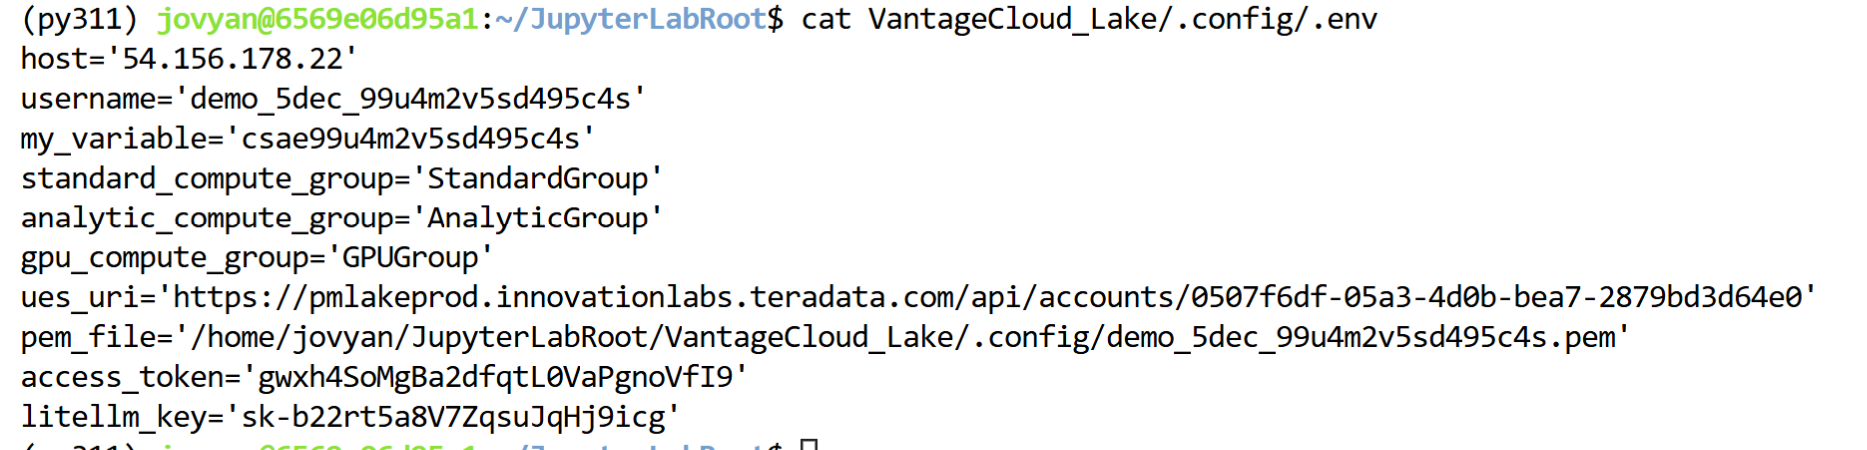<p style = 'font-size:16px;font-family:Arial'> After you select the Teradata TD2 Auth below screen will apear where you will have to provide credentials for accessing Teradata Database.<br>
<img src="./images/td_auth.png" alt="Teradata Credentials" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>
 <p style = 'font-size:16px;font-family:Arial'> In the ClearScape VM please go to the terminal and find the .env file we have provided.
   <ul style = 'font-size:16px;font-family:Arial'>
    <li> File > New Launcher > Terminal  <br>
       <img src="./images/terminal.png" alt="terminal" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>
       </li>
    <li>On terminal give the command <code>cat VantageCloud_Lake/.config/.env</code><br>
    The output from the command will be like below  <br> 
<img src="./images/env_file.png" alt="env file" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>     </li>
   </ul>
<p style = 'font-size:16px;font-family:Arial'> 
<p style = 'font-size:16px;font-family:Arial'> In the authentication we will provide the following values obtained from the env file.  
<ul style = 'font-size:16px;font-family:Arial'>
    <li><b>Credential Name :</b> TD_Authenticaton or Any name you like </li>
    <li><b>Teradata TD2 Auth Username:</b> username from the env file</li>
    <li><b>Teradata TD2 Auth Password:</b> my_variable from the env file</li>
</ul> 

<p style = 'font-size:16px;font-family:Arial'> <i> <b>Note: </b>Click Add only once, it may take some time to save, but clicking multiple times will create multiple copies </i>

<hr style="height:2px;border:none">
<p style = 'font-size:20px;font-family:Arial'><b>4. Configuring the required credentials for Lite LLM</b></p>
<p style = 'font-size:16px;font-family:Arial'>Follow the steps below for configuring credentials for Lite LLM.
    <ol style = 'font-size:16px;font-family:Arial'>
    <li>Go to the credentials tab again on left side menu </li>
    <li>Select Add Credential to begin adding your credentials.</li>
    <li>Search and select <b>LLM</b>
        </ol>  
<img src="./images/llm_cred.png" alt="Teradata Credentials" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>
<p style = 'font-size:16px;font-family:Arial'> After you select the Litellm Api below screen will apear where you will have to provide credentials.<br>
<img src="./images/llm_api.png" alt="Teradata Credentials" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>
 
<ul style = 'font-size:16px;font-family:Arial'>
    <li><b>Credential Name :</b> LLM_API_Key or Any name you like </li>
    <li><b>API Key:</b>  Copy litellm_key from .env file you had open from terminal. It should look like 'sk-xxxx'</li>
</ul> 


<hr style="height:2px;border:none">
<p style = 'font-size:20px;font-family:Arial'><b>5. Creating your first Agent</b></p>
<p style = 'font-size:16px;font-family:Arial'>After you have created your credentails as instructed in above steps the same will appear in you credentials tab.<br>
<img src="./images/creds.png" alt="Credentials" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/>
<p style = 'font-size:16px;font-family:Arial'> Now we can create our agents and agentflow. For our demonstration we will create a very data exploration agent which will answer our questions regarding the tables we have in our database. For this<br>
<ol style = 'font-size:16px;font-family:Arial'>
    <li>Go to Agentflow on left side menu > Add New <br>
    <img src="./images/agentflow_add.png" alt="AgentFLow Add" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/></li>
    <li> Inside the agentflow you will get a blank canvas with <b>Start</b> node <br> 
        <img src="./images/a_step1.png" alt="Step1" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/></li>
        <li>Start Node is where you set up variables that your agent will use throughout it's 
workflow. Think of these variables as containers that hold valuable information the agent needs to 
remember and use as it works. We will define our database in one variable here.<br> Double click on the start node > add flow state > add <b>db_name</b> in key and <b>FINSERV</b> in value. Here we are specifying that agent will answer question only from the FINSERV database.<br> 
        <img src="./images/a_step2.png" alt="Step2" style="width: 50%; border: 4px solid #404040; border-radius: 10px;"/></li>
            <li> Before Proceeding save your Agentflow. Click anywhere outside the node to return to the canvas and click Save button at top right and give name to your agentflow. </li>
            <li>Now click on the + sign on left side to add nodes > drag Agent node your canvas<br>
        <img src="./images/a_step3.png" alt="Step 3" style="width: 50%; border: 4px solid #404040; border-radius: 10px;"/></li>
     <li>Join the output of the Start node to the input of the Agent0 </li>
     <li>The Agent Node is where the main logic happens — it processes the user’s input and generates a response 
using tools like LLMs and external systems. <ul style = 'font-size:16px;font-family:Arial'>
    <li>Double click on Agent0 to open its settings. Rename node if needed</li>
    <li>First we will configure the LLM we will use. Add the below details 
        <ul style = 'font-size:16px;font-family:Arial'>
            <li><b>Model:</b> ChatLitellm </li>
            <li><b>Connect Credential:</b> Use the credential we created in Section 4 </li>
            <li><b>Base URL:</b> https://llmlite.ci.clearscape.teradata.com/</li>
            <li><b>Model Name:</b> openai-gpt-41</li>
            <li><img src="./images/a_step4.png" alt="Step 4" style="width: 50%; border: 4px solid #404040; border-radius: 10px;"></li>
        </ul>
         </ul>
    <li>Click Add Message and select System from the Role dropdown.<br>Role Field Options:
     <ul style = 'font-size:16px;font-family:Arial'>
            <li><b>System:</b> Sets rules or context for the agent. This will be used as System Prompt.</li>
            <li><b>User:</b> Represents the user’s message.</li>
            <li><b>Assistant:</b> Represents the agent’s response.</li>
        </ul></li>
    <li>Paste the provided prompt into the Content field.<br><code>You are an assistant data analyst. Answer user questions related to database basics—tables, columns, schema, etc.—using only the default database named "{{ $flow.state.db_name }}". Never ask the user which database to use; always assume and use "{{ $flow.state.db_name }}". Provide clear, factual, beginnerfriendly explanations focused on schemas, tables, columns, their relationships, and data basics. Always pass table_name as database.table_name.  
## 1. Steps 
* Read the user's question to determine what information about database structure is needed. 
* Refer only to the "{{ $flow.state.db_name }}" database as default and its contents (tables, columns, 
schemas). 
* Apply logical or general reasoning if information is ambiguous or schema is not provided. 
* Run SQL query to make calculations. Do not generate answer by own  
* Explain your reasoning before presenting your final answer. 
* Present answers in a clear, concise format suitable for someone new to database concepts.  
## 2. Output Format 
* Provide a paragraph response. 
* Begin with a step-by-step explanation or reasoning process. 
* Conclude with the final answer or direct explanation. 
* Do not use code blocks. 
* Do not ask for the database name.  
## 3. Examples 
**Example 1**   
User input: "What tables are available in the database?"   
Response: First, consider the default database, which is named "{{ $flow.state.db_name }}." To answer the 
user's question, list all the tables that exist within this database. The tables available in the 
"{{ $flow.state.db_name }}" database are: [table1], [table2], [table3].  
**Example 2**   
User input: "What columns does the users table have?"   
Response: To answer this, focus on the "users" table within the default "{{ $flow.state.db_name }}" 
database. Identify all columns (fields) present in this table. The "users" table in the 
"{{ $flow.state.db_name }}" database contains the following columns: [column1], [column2], [column3], etc. 
## 4. Notes 
* Assume all queries relate solely to the "{{ $flow.state.db_name }}" database. 
* Never prompt for database selection or names. 
* When exact schema or data is not specified, use plausible placeholders or general examples.</code>
<br>
<img src="./images/a_step5.png" alt="Step 5" style="width: 50%; border: 4px solid #404040; border-radius: 10px;"/></li>
       <li>Tools- Lets you connect the agent to external tools (like Teradata MCP). Click on add tools</li>
       <li>In the Tool field, type <b>Teradata MCP</b> and select it from the list. </li>
       <li> Expand the Teradata MCP Parameters section to continue with the configuration steps. Add the below details
        <ul style = 'font-size:16px;font-family:Arial'>
            <li><b>Connect Credential :</b> use the Teradata authentication created in section 3 </li>
            <li><b>MCP Server URL :</b> http://host.docker.internal:8001/mcp </li>
            <li><b>Available Actions :</b> Click the sync icon to load tools from the Teradata MCP server. (Note: This will take a couple of seconds.) Once loaded, select the following tools (either from the dropdown or by searching them one by one).<br>BASE_COLUMNDESCRIPTION<br>BASE_DATABASELIST <br>BASE_READQUERY <br>BASE_TABLEDDL<br>
BASE_TABLELIST  <br>BASE_TABLEPREVIEW  <br>DBA_TABLESQLLIST </li>
            <li> Activate Require Human Input. This will ask user for permission before executing MCP tool </li>
    </ul>
   <br>
        <img src="./images/a_step6.png" alt="Step 6" style="width: 50%; border: 4px solid #404040; border-radius: 10px;"/></li>
        <li>To make the chatbot conversational, enable memory. </li>
        <li> Set the Memory Type to All Messages. </li>
        <li> Save and validate your nodes</li>
        </ul>
        <li> The flow should look like below<br>        <img src="./images/a_step7.png" alt="Step 7" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/></li>

   

<hr style="height:2px;border:none">
<p style = 'font-size:20px;font-family:Arial'><b>6. Executing</b></p>
<p style = 'font-size:16px;font-family:Arial'>We have created our first agent, lets execute it now to see how it works with our database and tables and give answers to our questions.
    <ol style = 'font-size:16px;font-family:Arial'>
    <li>Open chat window from right side of the agent flow.<br> 
        <img src="./images/a_step8.png" alt="Step 8" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/></li>
    <li>Type 'Hi' in chat and if everything is ok, you should get a similar response.<br>
     <img src="./images/a_step9.png" alt="Step 9" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/></li>
        <li>Ask the below questions or any other question you wish from our agent.<ul style = 'font-size:16px;font-family:Arial'>
            <li>Suggest me approach to reduce churn </li>
            <li>From which table I can get clv value of customer</li>
            <li>Is there any corelation between clv and average balance</li>
         </ul>
            <li>Since we have enabled Human input field, everytime the agent calls The MCP tool, you will get a notice to run the query or not. Select Proceed.<br><img src="./images/a_step10.png" alt="Step 9" style="width: 70%; border: 4px solid #404040; border-radius: 10px;"/></li>
        </ol>
<p style = 'font-size:16px;font-family:Arial'>Ask a business question and receive a response. Since this is a simple agent, it can only handle basic questions. While its capabilities can be enhanced, such improvements are currently out of scope for this demo.


<hr style="height:2px;border:none">
<p style = 'font-size:20px;font-family:Arial'><b>Conclusion</b></p>
<p style = 'font-size:16px;font-family:Arial'>In this notebook we have seen how we can connect to the Flowise AgentBuilder platform and how we create the authentication credentials required to use Teradata MCP and LiteLLM. We have also learned how we can create a simple agent and saw its responses.</p>

<footer style="padding-bottom:35px; border-bottom:3px solid #91A0Ab">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2025. All Rights Reserved
        </div>
    </div>
</footer>